[講義](https://nbviewer.jupyter.org/github/yenlung/nccu-jupyter-math/blob/master/1081%E8%A8%AD%E8%A8%88%E6%80%9D%E8%80%83%E8%88%87%E4%BA%BA%E5%B7%A5%E6%99%BA%E6%85%A7/D02.%20%E7%94%A8CNN%E5%9C%96%E5%BD%A2%E8%BE%A8%E8%AD%98%EF%BC%88%E9%82%84%E6%98%AFMNIST%EF%BC%89.ipynb)
Yann LeCun 被譽為 Deep Learning 的三巨頭之一。他的 CNN (Convolutional Neural Networks) 是讓 Neural Network 重新受到重視的主因之一。

## 2-1 初始準備

%env KERAS_BACKEND=tensorflow

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## 2-2 讀入 MNIST 數據庫
### 由 Keras 讀入 MNIST
基本上和我們上次一樣, 這次因為 Keras 已偷偷把數據庫存在你的電腦, 所以會快很多!

In [3]:
from keras.datasets import mnist

Using TensorFlow backend.


In [4]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

### 輸入格式整理
如果你還記得, 我們每筆輸入資料都是 28x28 的陣列, CNN 其實就是吃「圖」的, 所以基本上不用像之前把每筆資料拉平。「但。是。」平常的圖都有 R, G, B 三個 channels, 每個 channel 都是一個矩陣, 也就是一張圖可能是三個矩陣! 我們是灰階, 也就是只有一個 channel。但這件事也要明確的告訴 Keras。

換句話說, 我們的輸入每筆資料型式要從 (28, 28) 換成 (28, 28, 1)!

In [5]:
x_train[1234].shape

(28, 28)

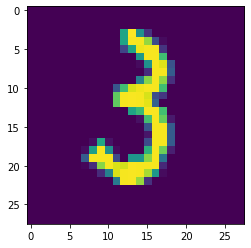

In [6]:
x_train[1234]
plt.imshow(x_train[1234], )

In [8]:
y_train[1234]

3

In [ ]:
# CNN 本身 Input 是矩陣
# CNN 要的格式 28*28 的一張 (28, 28, 1)
# 按照三張分色 或四張分色 就要有三張或四張()因為我們現在是灰階所以只要一張

In [7]:
x_train = x_train.reshape(60000, 28, 28, 1)
x_test = x_test.reshape(10000, 28, 28, 1)

### 輸出格式整理
和上次一樣, 我們用標準 1-hot 方式處理。

In [8]:
# 因為希望數字不要是 3.7 8.2 因為結果間沒有連續關係
# one hot encoding

from keras.utils import np_utils
y_train = np_utils.to_categorical(y_train, 10)
y_test = np_utils.to_categorical(y_test, 10)

In [9]:
y_train[1234]
# 就會在第四個值是 1 其他都是 0

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [10]:
# 壓縮 0-1 (原是 0-255)
# 數值大的容易成為關鍵
# 不是 0-1 不能用統計的理論

x_train = x_train/255
x_test = x_test/255

## 2-3 打造你的 CNN
決定神經網路架構、讀入相關套件
CNN 我們一樣要決定用幾層的 CNN, 然後是不是每次都要做 max-pooling。再來就是拉平、送入標準神經網路 (再度要決定幾層、幾個神經元)。

我們上課的時候說過, 我們準備要做 3 次的 convolution + max-pooling, filter 大小都是 3×3。

做 3 次 convolution, 每次都接 max-pooling
filter 大小都是 3x3, max-pooling 都用 2x2 為一小區塊
CNN 一個小技巧是每層的 filters 數目是越來越多, 上課同學建議第一層 4 個, 因為要做三次, 所以我們 filters 數分別是 4, 8, 16。做完 convolution 之後, 我們要拉平、再送入一個標準的神經網路。這個神經網路設計是這樣:

只有 2 個隱藏層, 分別使用 17, 33 個神經元 (這也是同學建議)。

In [11]:
# 3 次 convolution 3 次 max-pooling
# 2 層 dense

# 輸出結果 0-9 有 10 個

# maxpooling 2*2

# convolution 1: filter(28*28)不算大， 4 個
# convolution 2: 8 個
# convolution 3: 16 個

# filter 大小可以取大概 3*3 大家喜歡奇數

# filter 應該要越來越多，因為基本原見的辨別應該沒有很多項、但是越高層開始從低層的結果組合，可以有更種搭配組合可能

# 第一層 17 個神經元 
# 

from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten
from keras.layers import Conv2D, MaxPool2D
from keras.optimizers import SGD

### 建構我們的神經網路
一開始一樣是打開個空白的神經網路。

In [12]:
model = Sequential()

第一個隱藏層一樣要告訴 Keras 我們輸入長什麼樣子。padding 設成 same 是每個 filter 會輸出原來 28x28 一樣大小的矩陣。

In [13]:
# 4 個 filter 3*3的大小
# 加邊緣記分板同樣大小
# 第一層

model.add(Conv2D(4, (3, 3), padding='same', input_shape=(28, 28, 1),
                activation='relu'))

Max-Pooling!

In [14]:
model.add(MaxPool2D(pool_size=(2,2)))

第二次 Convolution!

In [15]:
# 第二層
model.add(Conv2D(8, (3, 3), padding='same',
                activation='relu'))

Max-Pooling!

In [16]:
# 不一定每次都要 maxpooling
model.add(MaxPool2D(pool_size=(2,2)))

第三次 Convolution!

In [17]:
# 第三層
model.add(Conv2D(16, (3, 3), padding='same',
                activation='relu'))

Max-Pooling 最終回。

In [18]:
model.add(MaxPool2D(pool_size=(2,2)))

然後我們要送進一般的神經網路了。記得這是要拉平的, 還在 Keras 會幫我們做!

In [19]:
# fully connected

# 前面是 keras 自己做的 他知道有幾個神經員輸入
model.add(Flatten())
model.add(Dense(9, activation='relu'))

In [20]:
model.add(Dense(33, activation='relu'))

In [21]:
# 結果輸出
model.add(Dense(10, activation='softmax'))

### 組裝
和之前比較不一樣的是我們還要做 compile 才正式把我們的神經網路建好。

In [22]:
model.compile(loss='mse', optimizer=SGD(lr=0.07), metrics=['accuracy'])

### 檢視我們的神經網路

In [23]:
model.summary()
# 28*28 的圖 給 filter 3*3 用了 4 個 輸出的結果是 28*28 
# 每一個 FILTER 只有一個 bias
# 3*3*4 + 4 = 40
# 跟圖片大小沒關係
# 參數值不多

# 296
# 第一層後產生四張 28*28 的矩陣；所以有四層；要在乘上 4
# 3*3*8*4 + 8

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 4)         40        
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 4)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 8)         296       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 8)           0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 7, 7, 16)          1168      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 3, 3, 16)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 144)              

## 1-4 訓練

In [24]:
model.fit(x_train, y_train, batch_size=70, epochs=20)

Epoch 1/20
60000/60000 [==============================] - 12s 202us/step - loss: 0.0899 - accuracy: 0.1893
Epoch 2/20
60000/60000 [==============================] - 12s 204us/step - loss: 0.0896 - accuracy: 0.2231
Epoch 3/20
60000/60000 [==============================] - 12s 196us/step - loss: 0.0890 - accuracy: 0.2434
Epoch 4/20
60000/60000 [==============================] - 13s 211us/step - loss: 0.0850 - accuracy: 0.2874
Epoch 5/20
60000/60000 [==============================] - 12s 207us/step - loss: 0.0663 - accuracy: 0.5017
Epoch 6/20
60000/60000 [==============================] - 12s 198us/step - loss: 0.0353 - accuracy: 0.7529
Epoch 7/20
60000/60000 [==============================] - 11s 179us/step - loss: 0.0244 - accuracy: 0.8346
Epoch 8/20
60000/60000 [==============================] - 13s 209us/step - loss: 0.0191 - accuracy: 0.8725
Epoch 9/20
60000/60000 [==============================] - 12s 208us/step - loss: 0.0157 - accuracy: 0.8957
Epoch 10/20
60000/60000 [============

## 2-5 結果測試
### 分數
我們來看測試資料 (我們的 CNN 沒看過的)

In [36]:
score = model.evaluate(x_test, y_test)

10000/10000 [==============================] - 2s 167us/step


我們來看成績, 順便用 Python 3.6 開始的 f-string format 方式。

In [37]:
print(f'測試資料的 loss: {score[0]:.5f}')
print(f'測試資料的正確率: {score[1]}')

測試資料的 loss: 0.00589
測試資料的正確率: 0.9606


### 儲存結果
結果看來還不差, 所以我們把結果存起來。上次我們介紹分別存架構和權重的方法, 這次我們看看怎麼樣一次就存入權重 + 結構!

In [38]:
model.save('myCNNModel.h5')

### 欣賞一下成果
我們示範一下怎麼讀回我們的神經網路。你會發現讀回來之後就可以直接使用了!!

In [39]:
del model

先把我們原來的 model 刪掉, 保證接下來的是讀進來的。我們要用一個 load_model 的函式。

In [40]:
from keras.models import load_model

In [41]:
model = load_model('myCNNmodel.h5')

我們用另一個方式: 每次選 5 個顯示, 看是不是有正確辨識。

In [42]:
predict = model.predict_classes(x_test)

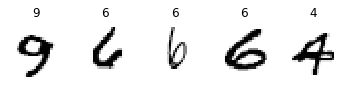

In [43]:
pick = np.random.randint(1,9999, 5)

for i in range(5):
    plt.subplot(1,5,i+1)
    plt.imshow(x_test[pick[i]].reshape(28,28), cmap='Greys')
    plt.title(predict[pick[i]])
    plt.axis("off")